In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import pandas as pd

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])
torch.float32


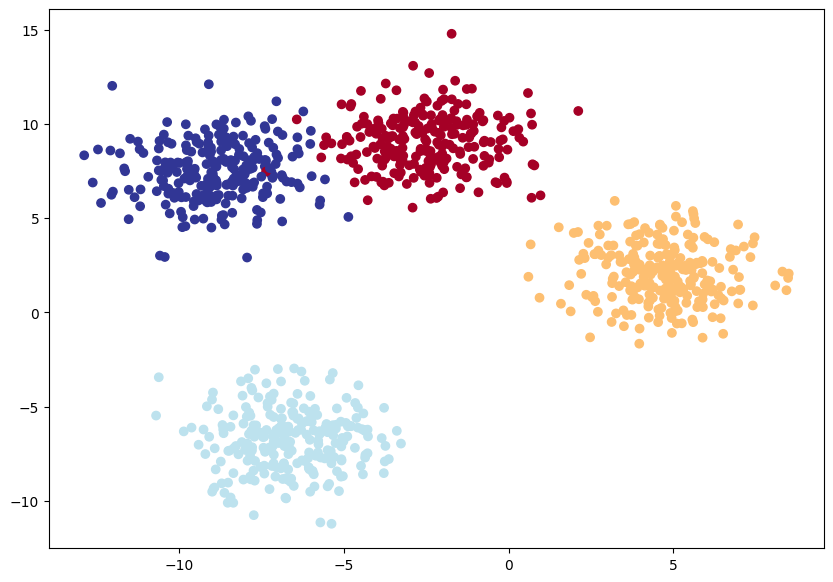

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
xtr, xte, ytr, yte = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
print(xtr.dtype)

In [ ]:
print(xtr.dim())

2


In [ ]:
class blob(nn.Module):
  def __init__(self):
    super().__init__()
    self.l=nn.Sequential(
        nn.Linear(in_features=2 ,out_features=10),

        nn.Linear(in_features=10,out_features=10),

        nn.Linear(in_features=10 ,out_features=4),
    )
  def forward(self,x:torch.tensor)->torch.tensor:
    return self.l(x)

m=blob()
l= nn.CrossEntropyLoss()
p=torch.optim.SGD(m.parameters(),
                  lr=0.1)





,epoch,traingloss,testloss
0,0,1.8642479,0.79098326
1,10,0.1385816,0.124662966
2,20,0.079879165,0.07180492
3,30,0.05922505,0.051621433
4,40,0.04906162,0.041355666
5,50,0.043127608,0.035221044
6,60,0.039282046,0.031167278
7,70,0.03660933,0.028298503
8,80,0.034656342,0.026165074
9,90,0.033174515,0.024517866


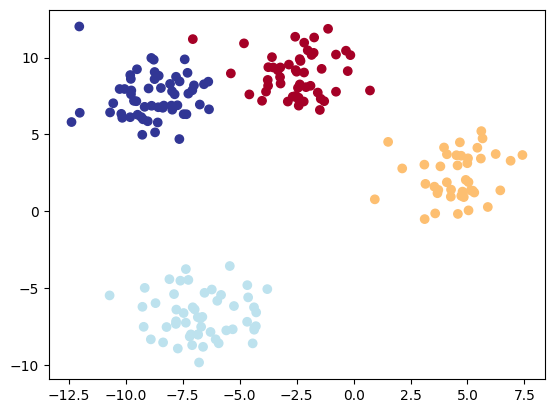

In [ ]:
epochs=100
e=[]
trc=[]
tec=[]

for epoch in range(epochs):
  m.train()
  ye=m(xtr)
  ypr=torch.softmax(ye, dim=1).argmax( dim=1)
  loss=l(ye,ytr)
  p.zero_grad()
  loss.backward()
  p.step()
  with torch.inference_mode():
      yr=m(xte)
      ype=torch.softmax(yr, dim=1).argmax(dim=1)
      tloss=l(yr,yte)
      if epoch%10==0:
        e.append(epoch)
        trc.append(loss.detach().numpy())
        tec.append(tloss.detach().numpy())
df=pd.DataFrame({"epoch":e,"traingloss":trc,"testloss":tec})
from IPython.display import display
display(df)

plt.scatter(xte[:, 0].detach().numpy(), xte[:, 1].detach().numpy(), c=ype.detach().numpy(), cmap=plt.cm.RdYlBu)


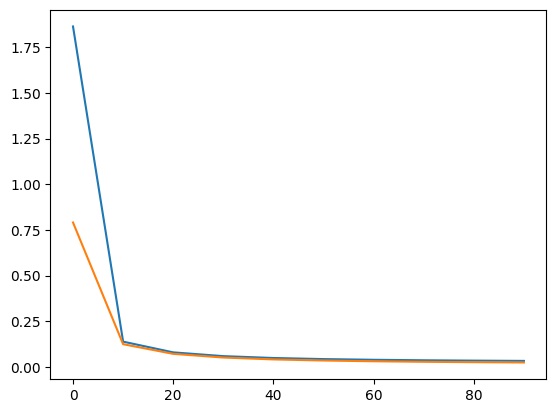

In [ ]:
plt.plot(e,trc)
plt.plot(e,tec)

In [ ]:
#accuracy,